In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=pd.read_csv("Iris.csv")
iris.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# ScatterPlot

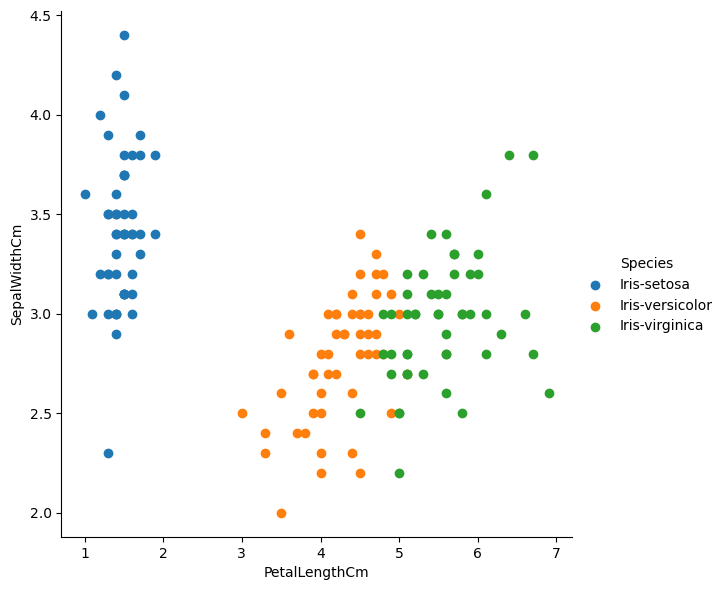

In [4]:
sns.FacetGrid(iris,hue="Species",height=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

# Logistic Regression

converting categorical variables into numbers 

In [5]:
flower_mapping ={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 }
iris["Species"]=iris["Species"].map(flower_mapping)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Preparing inputs and output

In [7]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris[['Species']].values

# Logestic Regreession

In [8]:
from sklearn.linear_model import LogisticRegression


In [9]:
model=LogisticRegression()

In [10]:
model.fit(X,y)

LogisticRegression()

# Accuracy

In [11]:
model.score(X,y)

0.9733333333333334

# Make Prediction


In [12]:
expected =y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Summerise the fit of the model

In [13]:
from sklearn import metrics

In [14]:
print(metrics.classification_report(expected,predicted) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [15]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


<function matplotlib.pyplot.show(close=None, block=None)>

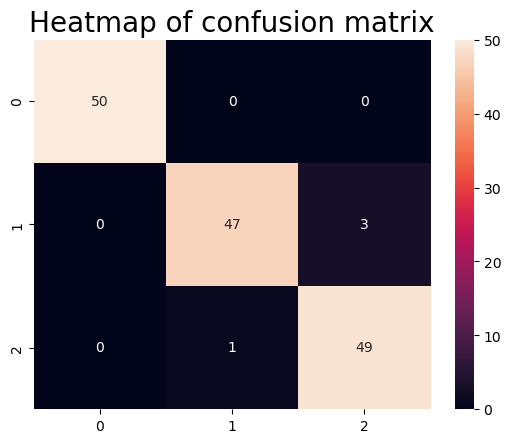

In [16]:
cm=metrics.confusion_matrix(expected,predicted)
plt.title('Heatmap of confusion matrix',fontsize=20)
sns.heatmap(cm,annot=True)
plt.show

# Regularization 

 Regularization of linear models
Regularization is a method for “constraining” or “regularizing” the size of the coefficients, thus “shrinking” them towards zero.
It reduces model variance and thus minimizes overfitting.
If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.
Our aim is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.


How does regularization work?
For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS):



In [17]:
model=LogisticRegression(C=20,penalty='none')

In [18]:
model.fit(X,y)

LogisticRegression(C=20, penalty='none')

In [19]:
model.score(X,y)

0.9866666666666667

In summary, by setting penalty='l2' and C=20, you are enabling L2 regularization in the logistic regression model with a moderate regularization strength. Regularization helps in controlling model complexity and reducing the risk of overfitting, which is crucial in improving the generalization performance of the model on unseen data.

In practice, it is common to try both L1 and L2 regularization and evaluate their performance on validation data to determine which one works better for the specific problem. Additionally, you can also try different values of the C parameter to adjust the strength of regularization.

If you are unsure about the penalty to choose, starting with L2 regularization (penalty='l2') is often a reasonable default option as it is more commonly used and generally performs well in a wide range of scenarios. However, every dataset is unique, and the best approach is to experiment and compare the results to make an informed decision about which penalty to use.




